<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Ignacio Zambrano &bull; 07-12-2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [1]:
# Paquetes necesarios
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Dataset de ejemplo
from sklearn import datasets

# Estandarización y reducción de dimensionalidad
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Modelado y evaluación
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)


---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

In [2]:
# Cargar el dataset Boston Housing desde un repositorio público
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Pasar los nombres de las columnas a mayúsculas para que coincidan con el enunciado
df.columns = [c.upper() for c in df.columns]

print("Dimensiones del dataset:", df.shape)
print("\nNúmero de atributos:", df.shape[1])
print("Nombres de los atributos:")
print(df.columns.tolist())

print("\nNúmero de filas:", df.shape[0])

# Verificar valores perdidos
print("\nValores perdidos por columna:")
print(df.isna().sum())

Dimensiones del dataset: (506, 14)

Número de atributos: 14
Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Número de filas: 506

Valores perdidos por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


Variables categóricas: ['CHAS', 'RAD']
Variables numéricas: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Frecuencias para CHAS:


,count
CHAS,
0,471
1,35


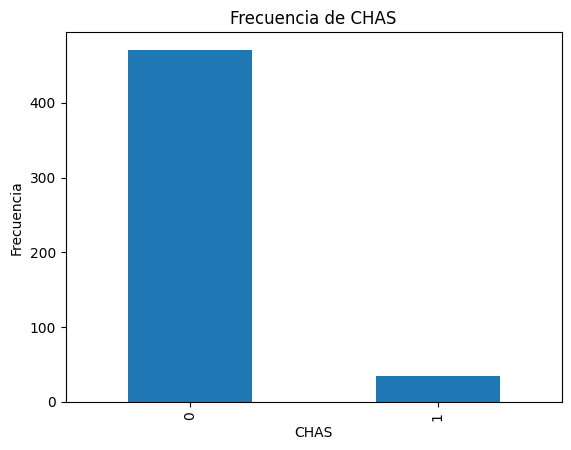


Frecuencias para RAD:


,count
RAD,
24,132
5,115
4,110
3,38
6,26
8,24
2,24
1,20
7,17


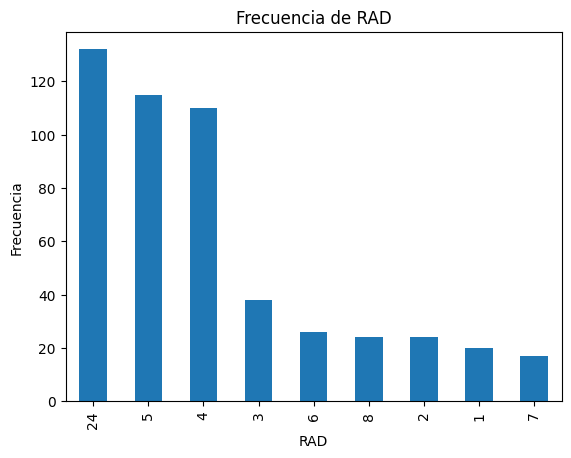


Estadísticos descriptivos de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
B,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000


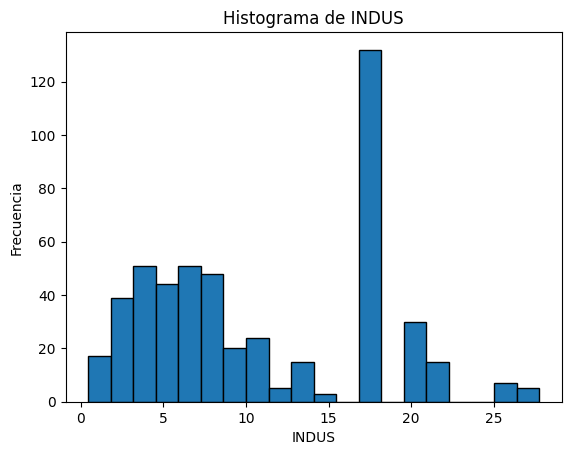

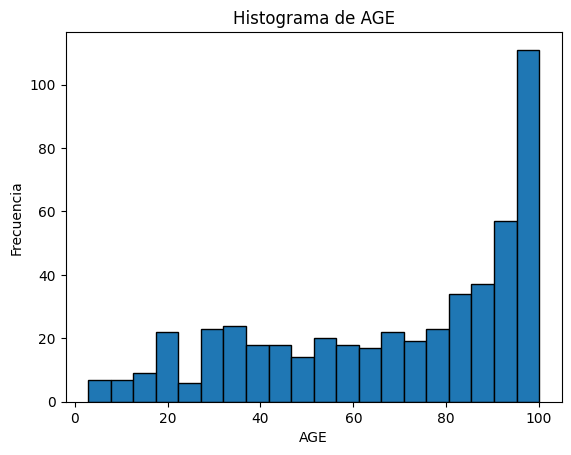

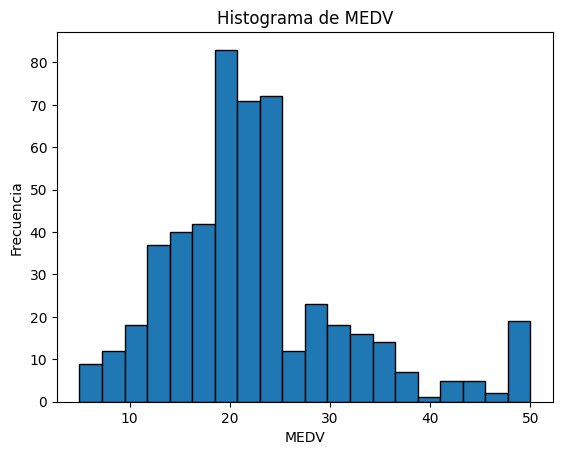

In [3]:
# Identificación sencilla de variables categóricas y numéricas
cat_cols = [col for col in df.columns if df[col].nunique() < 10]
num_cols = [col for col in df.columns if col not in cat_cols]

print("Variables categóricas:", cat_cols)
print("Variables numéricas:", num_cols)

# Frecuencia y gráfico de barras para variables categóricas
for col in cat_cols:
    print(f"\nFrecuencias para {col}:")
    display(df[col].value_counts())

    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# Estadísticos descriptivos para variables numéricas
print("\nEstadísticos descriptivos de variables numéricas:")
display(df[num_cols].describe().T)

# Histogramas para INDUS, AGE y MEDV
for col in ["INDUS", "AGE", "MEDV"]:
    if col in df.columns:
        plt.hist(df[col], bins=20, edgecolor="black")
        plt.title(f"Histograma de {col}")
        plt.xlabel(col)
        plt.ylabel("Frecuencia")
        plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

Las variables categóricas identificadas fueron **CHAS** y **RAD**, ambas con distribuciones desbalanceadas. En particular, CHAS muestra que muy pocas viviendas colindan con el río, lo que indica una clase minoritaria que podría ser difícil de predecir.

Las variables numéricas presentan rangos amplios y distribuciones diversas. Se observa que:

* **INDUS**: tiene una distribución multimodal, indicando zonas con distintos niveles de actividad industrial.
* **AGE**: está fuertemente sesgada hacia la derecha, lo que significa que la mayoría de viviendas son antiguas.
* **MEDV**: (precio mediano) concentra la mayoría de valores entre 15 y 30, con un grupo acumulado en 50 debido al límite superior del dataset.



### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

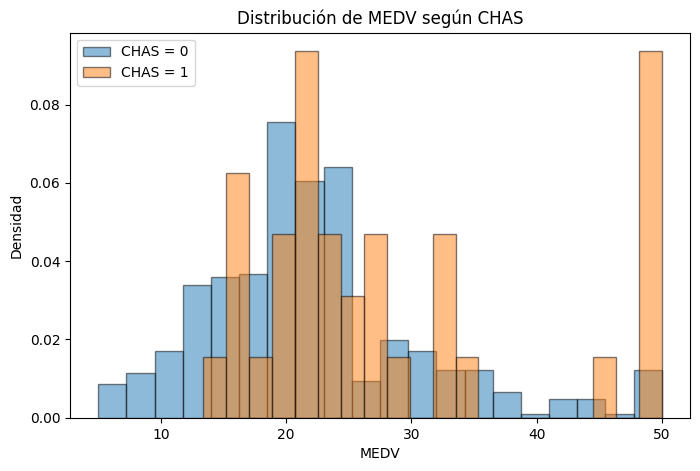

In [4]:
# Histogramas de MEDV separados por la clase CHAS
plt.figure(figsize=(8, 5))
classes = sorted(df["CHAS"].unique())

for chas_value in classes:
    subset = df[df["CHAS"] == chas_value]["MEDV"]
    plt.hist(
        subset,
        bins=20,
        density=True,
        alpha=0.5,
        label=f"CHAS = {chas_value}",
        edgecolor="black",
    )

plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.title("Distribución de MEDV según CHAS")
plt.legend()
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

A partir de los histogramas se observa que las viviendas con CHAS = 1 (cerca del río) tienden a presentar valores de MEDV ligeramente más altos que las viviendas con CHAS = 0. Sin embargo, las distribuciones se superponen, lo que significa que ambas clases comparten muchos rangos de precios.

Por esto, CHAS sí aporta algo de información, pero su peso predictivo es limitado: por sí solo no separa claramente los valores altos y bajos de MEDV. Funciona mejor como una variable complementaria dentro de un modelo con más atributos.



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [5]:
# Matriz de correlación completa
corr_matrix = df.corr()

# Correlaciones de cada atributo con MEDV
corr_medv = corr_matrix["MEDV"].sort_values(ascending=False)
print("Correlación de los atributos con MEDV:")
print(corr_medv)

Correlación de los atributos con MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


Variables seleccionadas para el pairplot: ['LSTAT', 'RM', 'PTRATIO', 'INDUS']


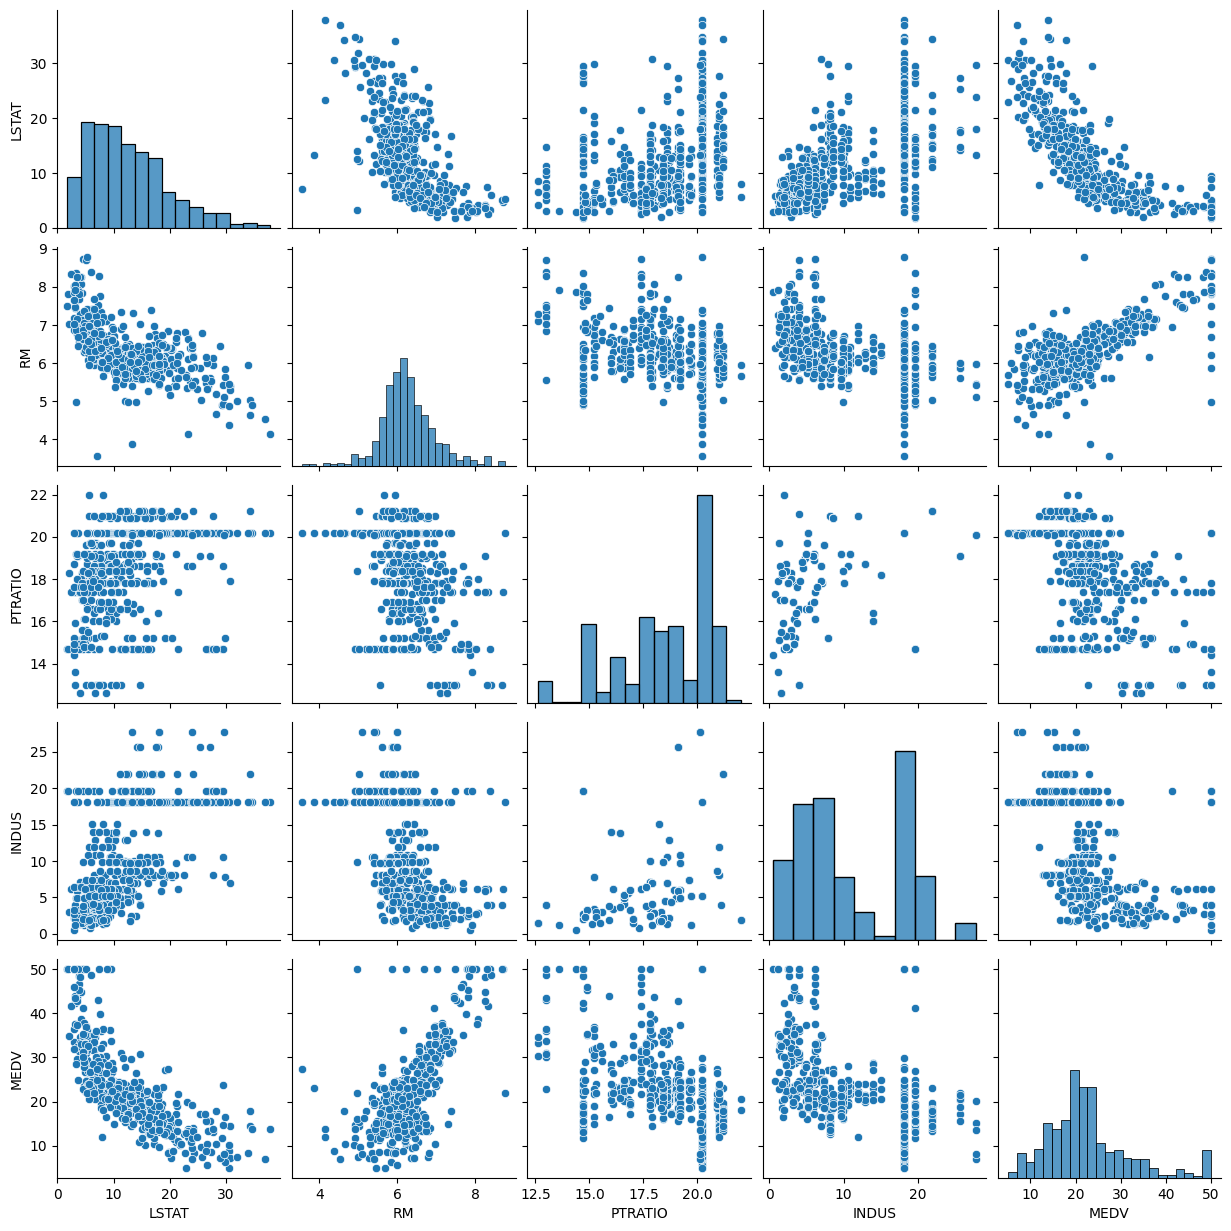

In [6]:
# Seleccionamos algunas de las variables más correlacionadas con MEDV
top_features = corr_medv.abs().sort_values(ascending=False).index[1:5]
print("Variables seleccionadas para el pairplot:", list(top_features))

sns.pairplot(df[list(top_features) + ["MEDV"]])
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


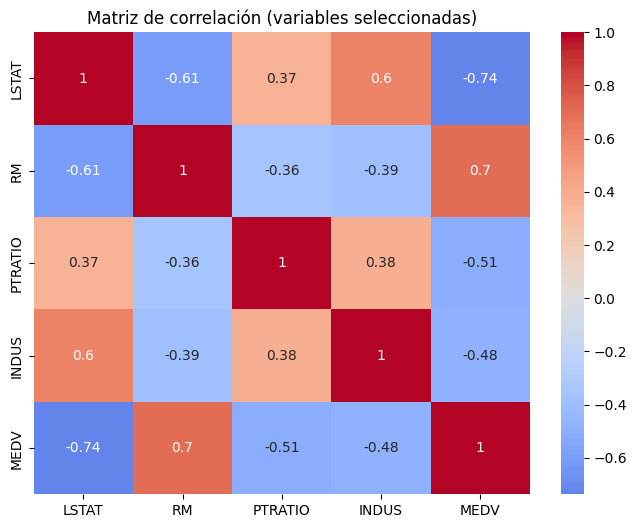

In [7]:
# Mapa de calor de la matriz de correlaciones de las variables seleccionadas
plt.figure(figsize=(8, 6))
sns.heatmap(df[list(top_features) + ["MEDV"]].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (variables seleccionadas)")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>



En los gráficos se confirman claramente las correlaciones identificadas numéricamente:

* La relación negativa fuerte entre LSTAT y MEDV se visualiza como una nube de puntos con pendiente descendente bastante marcada.
* La correlación positiva fuerte entre RM y MEDV también se observa fácilmente: a mayor número de habitaciones, mayor precio.
* Las relaciones con PTRATIO e INDUS son más débiles: en los gráficos los puntos están más dispersos y no muestran una tendencia lineal clara.
* La fuerte relación negativa entre LSTAT y RM también se aprecia en el pairplot: zonas con mayor nivel socioeconómico bajo tienden a tener menos habitaciones promedio.

Las tendencias visuales confirman lo que indican los coeficientes numéricos: RM y LSTAT son las variables más relacionadas con el precio de la vivienda, mientras que las demás presentan correlaciones más moderadas o débiles.


---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


Varianza explicada por cada componente principal:
[0.47129606 0.11025193]
Varianza explicada acumulada: 0.5815479960486266


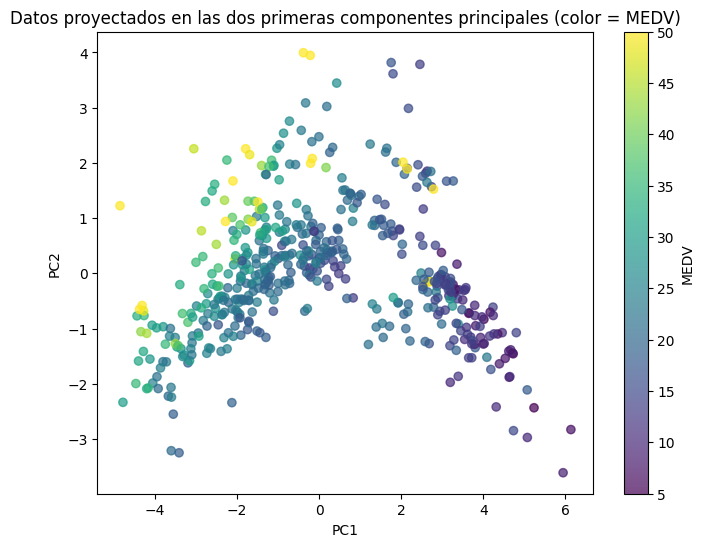

In [8]:
# Variables predictoras para PCA: excluimos MEDV (variable objetivo en este ejercicio)
X_pca_input = df.drop(columns=["MEDV"])

# Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_input)

# PCA a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.sum())

# DataFrame con las componentes principales y las variables objetivo de interés
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["MEDV"] = df["MEDV"].values
df_pca["CHAS"] = df["CHAS"].values

# Gráfico de dispersión coloreando por MEDV
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"], c=df_pca["MEDV"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Datos proyectados en las dos primeras componentes principales (color = MEDV)")
cbar = plt.colorbar(scatter)
cbar.set_label("MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


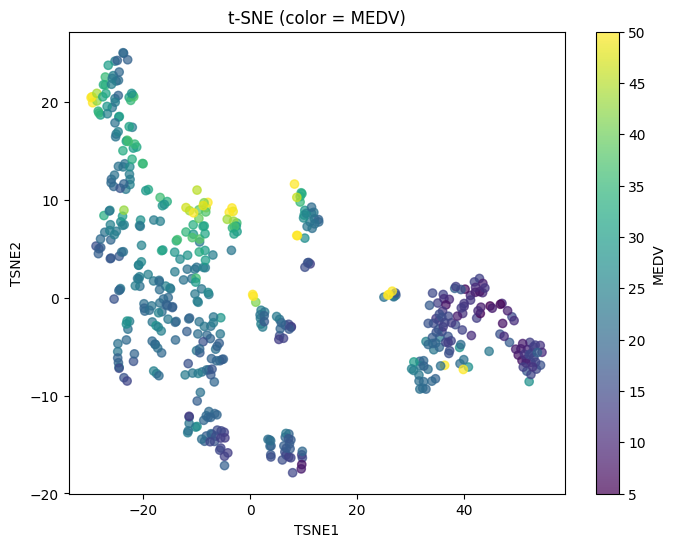

In [9]:
# t-SNE sobre las mismas variables (sin MEDV)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["MEDV"] = df["MEDV"].values

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"], c=df_tsne["MEDV"], cmap="viridis", alpha=0.7)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE (color = MEDV)")
cbar = plt.colorbar(scatter)
cbar.set_label("MEDV")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


En el gráfico de PCA, se observa un gradiente relativamente continuo de colores (valores de MEDV), lo cual indica que las dos componentes principales sí capturan parte importante de la variación del precio. Aunque la separación no es perfecta, los precios altos (amarillo) tienden a agruparse hacia un lado, y los precios bajos (morado) hacia el otro. Esto sugiere que PCA conserva información lineal relevante para predecir MEDV.

En cambio, el gráfico de t-SNE muestra grupos o “clusters” más marcados, pero sin un gradiente claro de MEDV dentro de ellos. Esto implica que t-SNE está preservando relaciones locales entre puntos, pero no necesariamente la estructura global del precio. Por eso no se aprecia una separación ordenada entre precios altos y bajos.

Si usáramos las 2 dimensiones para predecir MEDV, PCA daría mejores resultados, porque sus componentes principales están construidas específicamente para explicar la mayor varianza posible de los datos originales. t-SNE no está diseñado para modelar variación global, sino para representación visual.


Los resultados son tan diferentes porque:

* PCA: es lineal y prioriza maximizar la varianza explicada en cada componente.
* t-SNE: es no lineal y prioriza preservar distancias locales, no la estructura global.




---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


In [10]:
# Definición de características y etiqueta para regresión (predicción de MEDV)
X_reg = df.drop(columns=["MEDV"])
y_reg = df["MEDV"]

# Parámetros de división del conjunto de datos
# Reemplaza el valor de random_state por el último dígito de tu cédula
random_state = 7
test_size = 0.2

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=test_size, random_state=random_state
)

print("Dimensiones de los conjuntos (regresión con datos originales):")
print("X_train:", X_train_reg.shape)
print("X_test :", X_test_reg.shape)
print("y_train:", y_train_reg.shape)
print("y_test :", y_test_reg.shape)

# Definir y entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

# Validación cruzada en el conjunto de entrenamiento
cv_r2 = cross_val_score(lin_reg, X_train_reg, y_train_reg, cv=5, scoring="r2")
cv_mae = -cross_val_score(lin_reg, X_train_reg, y_train_reg, cv=5, scoring="neg_mean_absolute_error")

print("\nResultados de validación cruzada (train, datos originales):")
print(f"R2 medio:  {cv_r2.mean():.4f}  (+/- {cv_r2.std():.4f})")
print(f"MAE medio: {cv_mae.mean():.4f}  (+/- {cv_mae.std():.4f})")

# Evaluación en el conjunto de prueba
y_pred_test = lin_reg.predict(X_test_reg)
r2_test = r2_score(y_test_reg, y_pred_test)
mae_test = mean_absolute_error(y_test_reg, y_pred_test)

print("\nResultados en test (datos originales):")
print(f"R2 en test:  {r2_test:.4f}")
print(f"MAE en test: {mae_test:.4f}")

Dimensiones de los conjuntos (regresión con datos originales):
X_train: (404, 13)
X_test : (102, 13)
y_train: (404,)
y_test : (102,)

Resultados de validación cruzada (train, datos originales):
R2 medio:  0.7515  (+/- 0.0488)
MAE medio: 3.2086  (+/- 0.2427)

Resultados en test (datos originales):
R2 en test:  0.5785
MAE en test: 3.7808


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [11]:
# Conjunto de datos reducido a 2 dimensiones con PCA para regresión
X_reg_pca = df_pca[["PC1", "PC2"]]
y_reg_pca = df_pca["MEDV"]

X_train_reg_pca, X_test_reg_pca, y_train_reg_pca, y_test_reg_pca = train_test_split(
    X_reg_pca, y_reg_pca, test_size=test_size, random_state=random_state
)

print("Dimensiones de los conjuntos (regresión con PCA):")
print("X_train_pca:", X_train_reg_pca.shape)
print("X_test_pca :", X_test_reg_pca.shape)

lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_reg_pca, y_train_reg_pca)

cv_r2_pca = cross_val_score(lin_reg_pca, X_train_reg_pca, y_train_reg_pca, cv=5, scoring="r2")
cv_mae_pca = -cross_val_score(lin_reg_pca, X_train_reg_pca, y_train_reg_pca, cv=5, scoring="neg_mean_absolute_error")

print("\nResultados de validación cruzada (train, PCA):")
print(f"R2 medio:  {cv_r2_pca.mean():.4f}  (+/- {cv_r2_pca.std():.4f})")
print(f"MAE medio: {cv_mae_pca.mean():.4f}  (+/- {cv_mae_pca.std():.4f})")

y_pred_test_pca = lin_reg_pca.predict(X_test_reg_pca)
r2_test_pca = r2_score(y_test_reg_pca, y_pred_test_pca)
mae_test_pca = mean_absolute_error(y_test_reg_pca, y_pred_test_pca)

print("\nResultados en test (PCA):")
print(f"R2 en test:  {r2_test_pca:.4f}")
print(f"MAE en test: {mae_test_pca:.4f}")

Dimensiones de los conjuntos (regresión con PCA):
X_train_pca: (404, 2)
X_test_pca : (102, 2)

Resultados de validación cruzada (train, PCA):
R2 medio:  0.4820  (+/- 0.1016)
MAE medio: 4.8282  (+/- 0.4313)

Resultados en test (PCA):
R2 en test:  0.3282
MAE en test: 5.0776


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona claramente mejor con los datos originales. En ellos, el R² es más alto tanto en validación cruzada (≈0.75) como en el conjunto de prueba (≈0.58), y el MAE es más bajo. En cambio, usando solo las dos componentes principales de PCA, el rendimiento empeora notablemente: el R² cae a ≈0.33 en test y el MAE aumenta por encima de 5.

Este resultado tiene sentido. Al reducir de 13 variables originales a solo 2 componentes, se pierde una parte importante de la información útil para predecir MEDV. Aunque PCA concentra la mayor varianza posible en dos dimensiones, esa varianza no necesariamente corresponde a la variación relevante para la variable objetivo.

Además, el resultado está totalmente alineado con el ejercicio 3, donde se observó que la relación entre MEDV y varias variables específicas (como RM y LSTAT) era fuerte. Al comprimirlas todas en dos componentes, esas relaciones claras se van perdiendo, lo que explica el deterioro del rendimiento.

El modelo predictivo mantiene mayor capacidad explicativa con los datos originales, y la reducción de dimensionalidad con PCA solo es útil para visualización, no para mejorar la regresión.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [12]:
# Predicciones en el conjunto de test con el mejor modelo
y_pred_best = lin_reg.predict(X_test_reg)

# Cálculo de métricas
r2_best = r2_score(y_test_reg, y_pred_best)
mae_best = mean_absolute_error(y_test_reg, y_pred_best)

print("Métricas del mejor modelo (datos originales):")
print(f"R2  : {r2_best:.4f}")
print(f"MAE : {mae_best:.4f}")

Métricas del mejor modelo (datos originales):
R2  : 0.5785
MAE : 3.7808


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para un ejecutivo de una inmobiliaria, la métrica más útil sería MAE, porque expresa el error del modelo en la misma unidad que el precio de las viviendas. Es fácil de interpretar: por ejemplo, decir que “el modelo se equivoca en promedio en 3.8 unidades de precio” es directo, intuitivo y permite evaluar si el error es aceptable para el negocio.

Para un analista matemático, la métrica más apropiada sería R², ya que describe qué proporción de la variabilidad del precio está siendo explicada por el modelo. Esta métrica es más abstracta, pero es útil para comparar modelos, evaluar capacidad explicativa y analizar la estructura estadística del problema.

### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [13]:
# Clasificación: predecir CHAS a partir de los atributos originales
X_clf = df.drop(columns=["CHAS"])
y_clf = df["CHAS"]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=test_size, random_state=random_state, stratify=y_clf
)

# Escalado de características numéricas
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Definir y entrenar modelo k-NN (clasificación supervisada)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_clf_scaled, y_train_clf)

# Predicciones
y_pred_clf = knn.predict(X_test_clf_scaled)

# Métricas de clasificación
acc_full = accuracy_score(y_test_clf, y_pred_clf)
rec_full = recall_score(y_test_clf, y_pred_clf)
f1_full = f1_score(y_test_clf, y_pred_clf)

print("Resultados del modelo de clasificación (datos originales):")
print(f"Accuracy              : {acc_full:.4f}")
print(f"Sensibilidad (recall) : {rec_full:.4f}")
print(f"F1-score              : {f1_full:.4f}")

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_clf, y_pred_clf))

print("\nReporte de clasificación:")
print(classification_report(y_test_clf, y_pred_clf))

# Guardamos las métricas para compararlas luego
metrics_clf_original = {
    "accuracy": acc_full,
    "recall": rec_full,
    "f1": f1_full,
}

Resultados del modelo de clasificación (datos originales):
Accuracy              : 0.9216
Sensibilidad (recall) : 0.0000
F1-score              : 0.0000

Matriz de confusión:
[[94  1]
 [ 7  0]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.00      0.00      0.00         7

    accuracy                           0.92       102
   macro avg       0.47      0.49      0.48       102
weighted avg       0.87      0.92      0.89       102



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [14]:
# Clasificación con el dataset reducido por PCA (PC1 y PC2)
X_clf_pca = df_pca[["PC1", "PC2"]]
y_clf_pca = df_pca["CHAS"]

X_train_clf_pca, X_test_clf_pca, y_train_clf_pca, y_test_clf_pca = train_test_split(
    X_clf_pca, y_clf_pca, test_size=test_size, random_state=random_state, stratify=y_clf_pca
)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_clf_pca, y_train_clf_pca)

y_pred_clf_pca = knn_pca.predict(X_test_clf_pca)

acc_pca = accuracy_score(y_test_clf_pca, y_pred_clf_pca)
rec_pca = recall_score(y_test_clf_pca, y_pred_clf_pca)
f1_pca = f1_score(y_test_clf_pca, y_pred_clf_pca)

print("Resultados del modelo de clasificación (PCA):")
print(f"Accuracy              : {acc_pca:.4f}")
print(f"Sensibilidad (recall) : {rec_pca:.4f}")
print(f"F1-score              : {f1_pca:.4f}")

print("\nMatriz de confusión:")
print(confusion_matrix(y_test_clf_pca, y_pred_clf_pca))

print("\nReporte de clasificación:")
print(classification_report(y_test_clf_pca, y_pred_clf_pca))

metrics_clf_pca = {
    "accuracy": acc_pca,
    "recall": rec_pca,
    "f1": f1_pca,
}

Resultados del modelo de clasificación (PCA):
Accuracy              : 0.9706
Sensibilidad (recall) : 0.5714
F1-score              : 0.7273

Matriz de confusión:
[[95  0]
 [ 3  4]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.57      0.73         7

    accuracy                           0.97       102
   macro avg       0.98      0.79      0.86       102
weighted avg       0.97      0.97      0.97       102



<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo, usaría accuracy, porque es fácil de entender y resume qué porcentaje total de predicciones son correctas.

Para un analista matemático, usaría el F1-score, ya que combina precisión y sensibilidad y es más adecuado cuando la clase positiva es muy pequeña, como ocurre con CHAS.

El modelo con datos originales acierta mucho (alta accuracy), pero no discrimina la clase 1 (recall = 0). Esto significa que predice casi todo como CHAS = 0.

En cambio, el modelo con PCA discrimina mejor, pues identifica más de la mitad de los casos positivos (recall = 0.57) y obtiene un F1-score alto.

Esto se interpreta como que el primer modelo acierta por el desbalance; el segundo realmente distingue entre clases.